### Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn import preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison

import copy
import seaborn as sns
import os
from scipy import stats
import datetime

%matplotlib inline

In [2]:
data_path = '/mnt/d/lighthouse/Midterm_data/'

In [3]:
# 10770229 rows × 32 columns
flights = pd.read_csv(data_path + 'flights_cleaned.csv', header = 0)
flights.drop('Unnamed: 0', axis =1, inplace = True)

In [4]:
# Flight delays with outliers
flights_outlier = pd.read_csv(data_path + 'flight_delay_with_outliers.csv', header = 0)
flights_outlier.drop('Unnamed: 0', axis =1, inplace = True)
# Seperating date to (YEAR, MONTH, DAY)
flights_outlier['fl_date'] = pd.to_datetime(flights_outlier['fl_date'])
flights_outlier['year'] = flights_outlier['fl_date'].dt.year
flights_outlier['month'] = flights_outlier['fl_date'].dt.month
flights_outlier['date'] = flights_outlier['fl_date'].dt.day
# Dropping the old date column
flights_outlier.drop('fl_date', axis = 1, inplace = True)

In [23]:
flights_outlier

,dep_delay,arr_delay,year,month,date
0,-2.0,-12.0,2019,3,25
1,-5.0,-19.0,2019,3,25
2,1.0,-10.0,2019,3,25
3,99.0,94.0,2019,3,25
4,166.0,152.0,2019,3,25
...,...,...,...,...,...
15927480,16.0,-3.0,2019,3,25
15927481,88.0,99.0,2019,3,25
15927482,-5.0,-18.0,2019,3,25
15927483,-2.0,-11.0,2019,3,25


# Flights with extreme outliers

In [34]:
# 6917270 rows × 5 columns before removing extreme
# 6917089 rows × 5 columns after extreme outliers
flights_actual_delay_out = copy.deepcopy(flights_outlier[((flights_outlier['dep_delay']>0) & (flights_outlier['dep_delay']<1500)) | ((flights_outlier['arr_delay']>0) & (flights_outlier['arr_delay']<1500))])
flights_actual_delay_out.dropna(inplace = True)
flights_actual_delay_out

,dep_delay,arr_delay,year,month,date
2,1.0,-10.0,2019,3,25
3,99.0,94.0,2019,3,25
4,166.0,152.0,2019,3,25
5,15.0,2.0,2019,3,25
9,11.0,-1.0,2019,3,25
...,...,...,...,...,...
15927474,7.0,-8.0,2019,3,25
15927476,39.0,33.0,2019,3,25
15927479,1.0,-2.0,2019,3,25
15927480,16.0,-3.0,2019,3,25


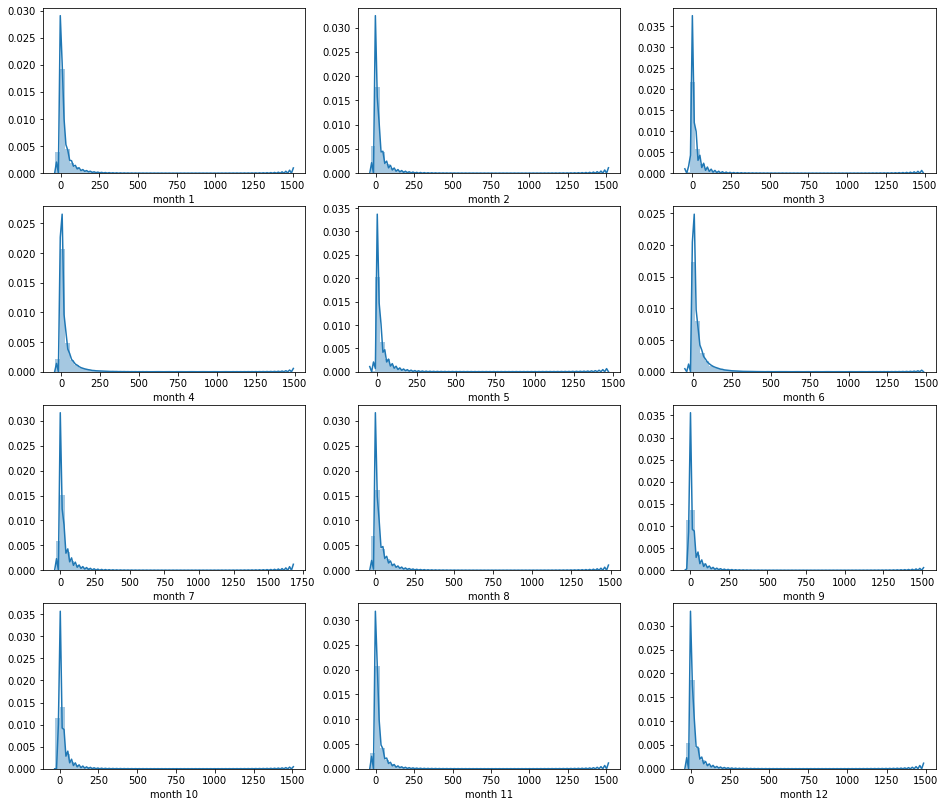

In [35]:
fig, ax = plt.subplots(4,3,figsize=(16,14))
row = 0
col = 0
for i in range(1,13):
    if col == 3:
        row += 1
        col = 0
    sns.distplot(flights_actual_delay_out[(flights_actual_delay_out['month'] == i)]['dep_delay'], ax = ax[row][col])
    ax[row][col].set(xlabel= f'month {i}')
    col += 1
#plt.savefig('/mnt/d/lighthouse/Midterm/visualization/Task_2_actual_dep_delay.png')

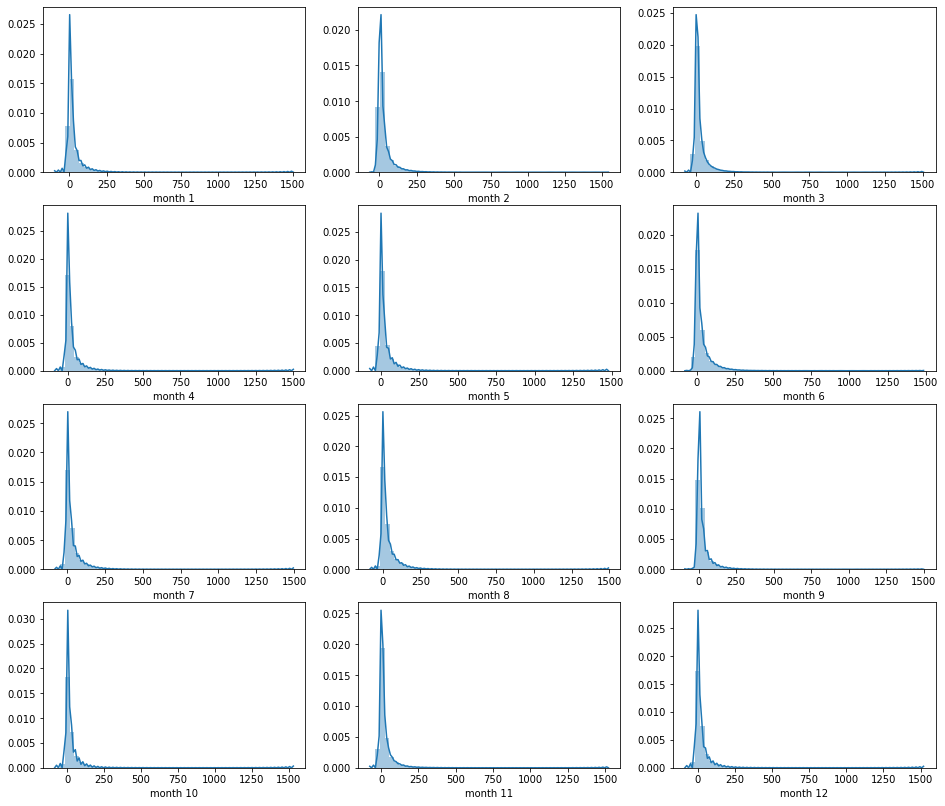

In [18]:
fig, ax = plt.subplots(4,3,figsize=(16,14))
row = 0
col = 0
for i in range(1,13):
    if col == 3:
        row += 1
        col = 0
    sns.distplot(flights_actual_delay_out[(flights_actual_delay_out['month'] == i)]['arr_delay'], ax = ax[row][col])
    ax[row][col].set(xlabel= f'month {i}')
    col += 1
#plt.savefig('/mnt/d/lighthouse/Midterm/visualization/Task_2_actual_dep_delay.png')

<AxesSubplot:xlabel='month', ylabel='arr_delay'>

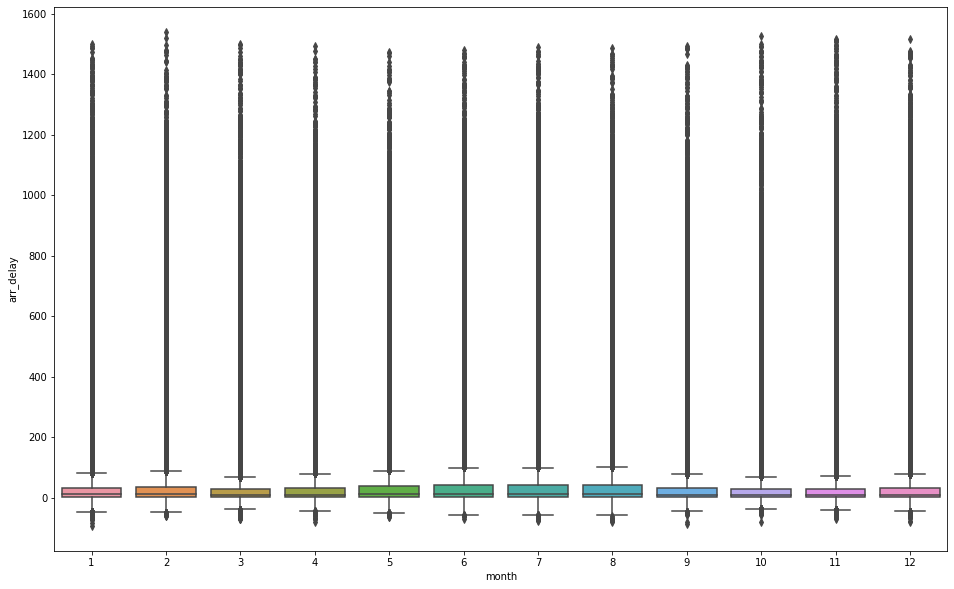

In [36]:
fig, ax = plt.subplots(figsize=(16,10))
sns.boxplot(x="month", y="arr_delay", data=flights_actual_delay_out)
#plt.savefig('/mnt/d/lighthouse/Midterm/visualization/Task_2_arr_delay_extreme_outliers.png')

In [37]:
ary_len = []
for i in range(1,13):
    ary_len.append(flights_actual_delay_out[flights_actual_delay_out['month'] == i]['dep_delay'].shape[0])
min_len = min(ary_len)

In [38]:
# Departure Delay
# Ho: mu1 = mu2 = ... = mu12
# Ha: as least one mu is different
stats.f_oneway(flights_actual_delay_out[flights_actual_delay_out['month'] == 1]['dep_delay'][:min_len],
               flights_actual_delay_out[flights_actual_delay_out['month'] == 2]['dep_delay'][:min_len],
               flights_actual_delay_out[flights_actual_delay_out['month'] == 3]['dep_delay'][:min_len],
               flights_actual_delay_out[flights_actual_delay_out['month'] == 4]['dep_delay'][:min_len],
               flights_actual_delay_out[flights_actual_delay_out['month'] == 5]['dep_delay'][:min_len],
               flights_actual_delay_out[flights_actual_delay_out['month'] == 6]['dep_delay'][:min_len],
               flights_actual_delay_out[flights_actual_delay_out['month'] == 7]['dep_delay'][:min_len],
               flights_actual_delay_out[flights_actual_delay_out['month'] == 8]['dep_delay'][:min_len],
               flights_actual_delay_out[flights_actual_delay_out['month'] == 9]['dep_delay'][:min_len],
               flights_actual_delay_out[flights_actual_delay_out['month'] == 10]['dep_delay'][:min_len],
               flights_actual_delay_out[flights_actual_delay_out['month'] == 11]['dep_delay'][:min_len],
               flights_actual_delay_out[flights_actual_delay_out['month'] == 12]['dep_delay'][:min_len],)

F_onewayResult(statistic=1227.6852180499063, pvalue=0.0)

In [40]:
# Arrival delay
# Ho: mu1 = mu2 = ... = mu12
# Ha: as least one mu is different
stats.f_oneway(flights_actual_delay_out[flights_actual_delay_out['month'] == 1]['arr_delay'][:min_len],
               flights_actual_delay_out[flights_actual_delay_out['month'] == 2]['arr_delay'][:min_len],
               flights_actual_delay_out[flights_actual_delay_out['month'] == 3]['arr_delay'][:min_len],
               flights_actual_delay_out[flights_actual_delay_out['month'] == 4]['arr_delay'][:min_len],
               flights_actual_delay_out[flights_actual_delay_out['month'] == 5]['arr_delay'][:min_len],
               flights_actual_delay_out[flights_actual_delay_out['month'] == 6]['arr_delay'][:min_len],
               flights_actual_delay_out[flights_actual_delay_out['month'] == 7]['arr_delay'][:min_len],
               flights_actual_delay_out[flights_actual_delay_out['month'] == 8]['arr_delay'][:min_len],
               flights_actual_delay_out[flights_actual_delay_out['month'] == 9]['arr_delay'][:min_len],
               flights_actual_delay_out[flights_actual_delay_out['month'] == 10]['arr_delay'][:min_len],
               flights_actual_delay_out[flights_actual_delay_out['month'] == 11]['arr_delay'][:min_len],
               flights_actual_delay_out[flights_actual_delay_out['month'] == 12]['arr_delay'][:min_len],)

F_onewayResult(statistic=1272.4843315496378, pvalue=0.0)

In [41]:
# arr: 2=4, 6=7=8, 9=12, 10=11
# dep: 3=11, 6=7
arr_tukey_test = pairwise_tukeyhsd(flights_actual_delay_out["arr_delay"], flights_actual_delay_out["month"])
dep_tukey_test = pairwise_tukeyhsd(flights_actual_delay_out["dep_delay"], flights_actual_delay_out["month"])

In [45]:
flights_actual_delay_out.groupby("month")['dep_delay'].describe().sort_values(by='mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
7,647314.0,35.095200,71.266843,-34.0,2.0,12.0,41.0,1675.0
6,662557.0,34.523747,69.199191,-47.0,2.0,12.0,40.0,1476.0
8,641668.0,34.449946,69.908798,-30.0,1.0,11.0,40.0,1480.0
5,597918.0,31.555882,65.920241,-42.0,1.0,10.0,36.0,1463.0
2,521036.0,31.008685,68.136683,-32.0,1.0,10.0,34.0,1509.0
1,519560.0,30.261419,68.192278,-34.0,1.0,9.0,33.0,1500.0
4,544339.0,29.311098,63.496786,-36.0,1.0,9.0,33.0,1486.0
12,610393.0,28.903723,64.588311,-32.0,1.0,10.0,32.0,1480.0
9,476024.0,27.649564,63.061681,-28.0,0.0,8.0,31.0,1504.0


In [46]:
flights_actual_delay_out.groupby("month")['arr_delay'].describe().sort_values(by='mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
8,641668.0,34.725805,70.202817,-79.0,2.0,13.0,42.0,1488.0
6,662557.0,34.634794,69.628786,-71.0,2.0,13.0,41.0,1479.0
7,647314.0,34.603256,71.279919,-77.0,2.0,12.0,41.0,1489.0
2,521036.0,31.481080,68.578989,-60.0,2.0,12.0,36.0,1540.0
5,597918.0,31.361175,66.303486,-65.0,2.0,11.0,37.0,1473.0
1,519560.0,29.801274,68.648083,-94.0,1.0,11.0,33.0,1499.0
4,544339.0,28.914844,63.650676,-81.0,2.0,10.0,33.0,1495.0
9,476024.0,27.969151,63.069118,-86.0,1.0,10.0,32.0,1493.0
12,610393.0,27.956012,64.993076,-80.0,1.0,10.0,32.0,1515.0


### count plot of each month

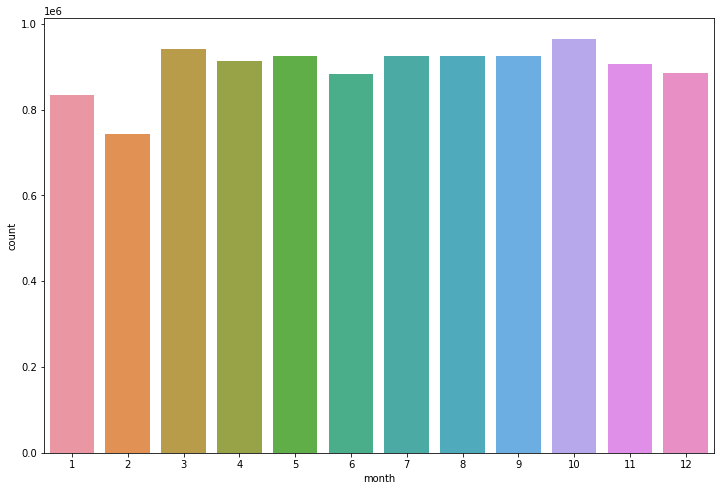

In [6]:
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(flights['month'])
plt.savefig('/mnt/d/lighthouse/Midterm/visualization/Task_2_month_count.png')

### making DF with only delays and month

In [112]:
flights_delay = copy.deepcopy(flights[['month','year', 'dep_delay', 'arr_delay']])
flights_delay = flights_delay.sample(frac=1)
flights_delay[['dep_delay', 'arr_delay']].describe()

,dep_delay,arr_delay
count,1.077023e+07,1.077023e+07
mean,-1.842786e+00,-9.211541e+00
std,7.310660e+00,1.102371e+01
min,-2.500000e+01,-3.900000e+01
25%,-6.000000e+00,-1.700000e+01
50%,-3.000000e+00,-1.000000e+01
75%,0.000000e+00,-2.000000e+00
max,2.600000e+01,2.000000e+01


### Only ACTUAL delays (positive times)

In [114]:
flights_actual_delay = flights_delay[(flights_delay['dep_delay']>0) | (flights_delay['arr_delay']>0)]
flights_actual_delay

,month,year,dep_delay,arr_delay
311833,7,2019,10.0,-5.0
8476706,9,2018,-6.0,8.0
9807862,5,2019,25.0,20.0
1175304,8,2018,12.0,-1.0
5973222,12,2019,-3.0,10.0
...,...,...,...,...
32458,3,2019,-4.0,8.0
1502749,10,2019,20.0,10.0
3438424,8,2019,1.0,0.0
9816963,5,2019,14.0,5.0


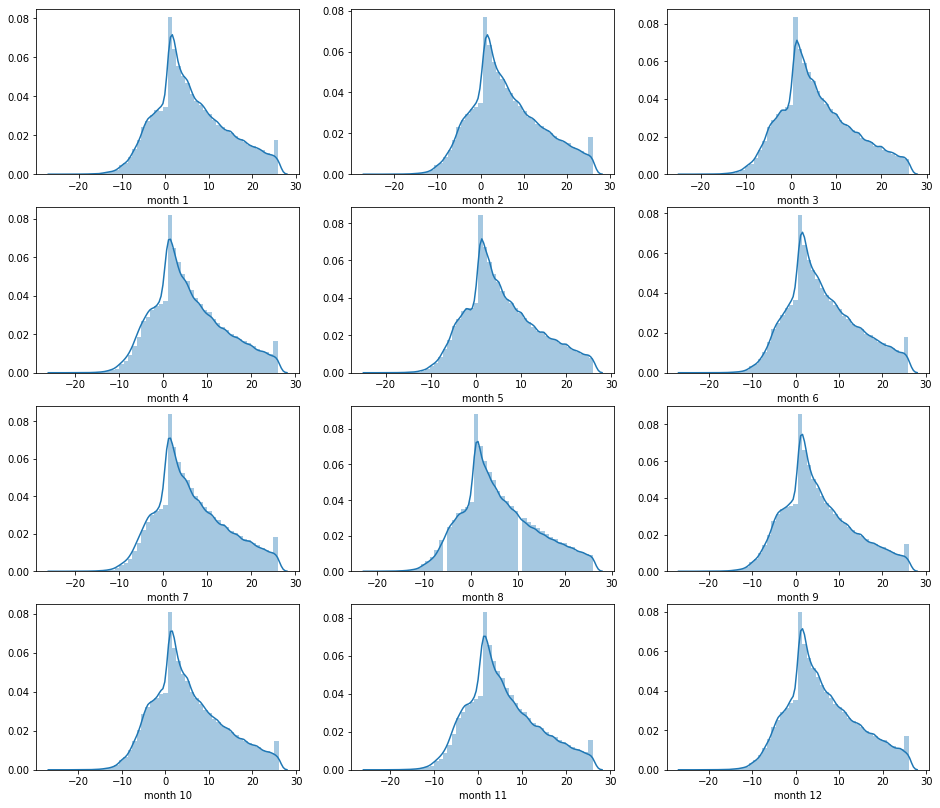

In [116]:
fig, ax = plt.subplots(4,3,figsize=(16,14))
row = 0
col = 0
for i in range(1,13):
    if col == 3:
        row += 1
        col = 0
    sns.distplot(flights_actual_delay[(flights_actual_delay['month'] == i)]['dep_delay'], ax = ax[row][col])
    ax[row][col].set(xlabel= f'month {i}')
    col += 1
plt.savefig('/mnt/d/lighthouse/Midterm/visualization/Task_2_actual_dep_delay.png')

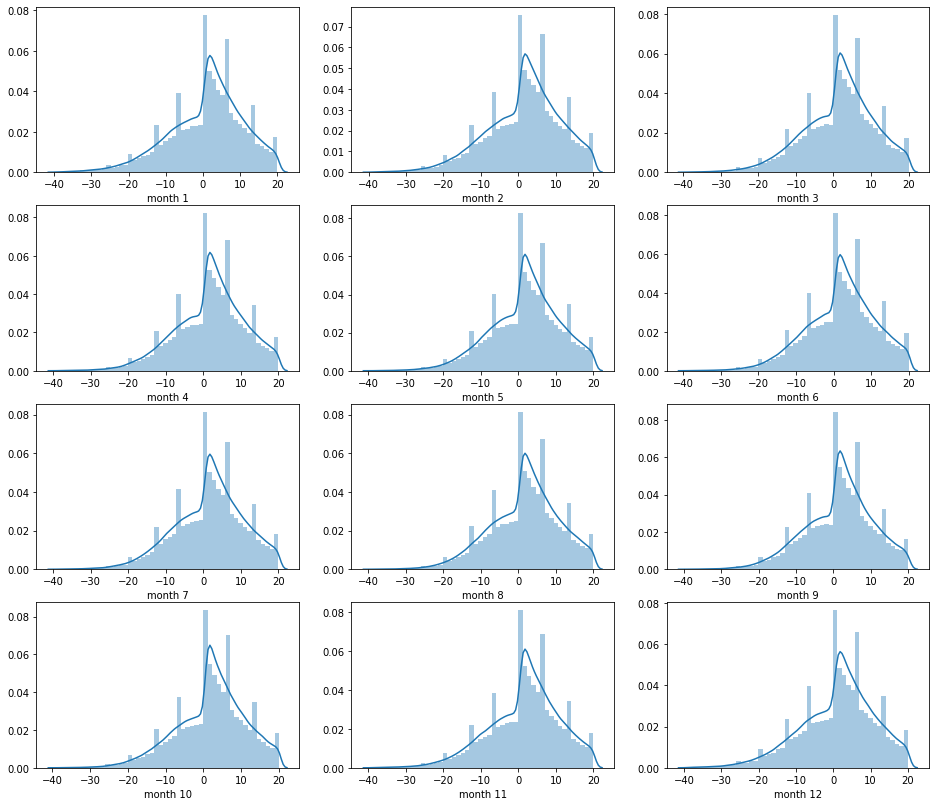

In [118]:
fig, ax = plt.subplots(4,3,figsize=(16,14))
row = 0
col = 0
for i in range(1,13):
    if col == 3:
        row += 1
        col = 0
    sns.distplot(flights_actual_delay[(flights_actual_delay['month'] == i)]['arr_delay'], ax = ax[row][col])
    ax[row][col].set(xlabel= f'month {i}')
    col += 1
plt.savefig('/mnt/d/lighthouse/Midterm/visualization/Task_2_actual_arr_delay.png')

In [119]:
ary_len = []
for i in range(1,13):
    ary_len.append(flights_actual_delay[flights_actual_delay['month'] == i]['dep_delay'].shape[0])
min_len = min(ary_len)

In [123]:
# Departure Delay
# Ho: mu1 = mu2 = ... = mu12
# Ha: as least one mu is different
stats.f_oneway(flights_actual_delay[flights_actual_delay['month'] == 1]['dep_delay'][:min_len],
               flights_actual_delay[flights_actual_delay['month'] == 2]['dep_delay'][:min_len],
               flights_actual_delay[flights_actual_delay['month'] == 3]['dep_delay'][:min_len],
               flights_actual_delay[flights_actual_delay['month'] == 4]['dep_delay'][:min_len],
               flights_actual_delay[flights_actual_delay['month'] == 5]['dep_delay'][:min_len],
               flights_actual_delay[flights_actual_delay['month'] == 6]['dep_delay'][:min_len],
               flights_actual_delay[flights_actual_delay['month'] == 7]['dep_delay'][:min_len],
               flights_actual_delay[flights_actual_delay['month'] == 8]['dep_delay'][:min_len],
               flights_actual_delay[flights_actual_delay['month'] == 9]['dep_delay'][:min_len],
               flights_actual_delay[flights_actual_delay['month'] == 10]['dep_delay'][:min_len],
               flights_actual_delay[flights_actual_delay['month'] == 11]['dep_delay'][:min_len],
               flights_actual_delay[flights_actual_delay['month'] == 12]['dep_delay'][:min_len],)

F_onewayResult(statistic=411.4631933350488, pvalue=0.0)

In [124]:
# Arrival delay
# Ho: mu1 = mu2 = ... = mu12
# Ha: as least one mu is different
stats.f_oneway(flights_actual_delay[flights_actual_delay['month'] == 1]['arr_delay'][:min_len],
               flights_actual_delay[flights_actual_delay['month'] == 2]['arr_delay'][:min_len],
               flights_actual_delay[flights_actual_delay['month'] == 3]['arr_delay'][:min_len],
               flights_actual_delay[flights_actual_delay['month'] == 4]['arr_delay'][:min_len],
               flights_actual_delay[flights_actual_delay['month'] == 5]['arr_delay'][:min_len],
               flights_actual_delay[flights_actual_delay['month'] == 6]['arr_delay'][:min_len],
               flights_actual_delay[flights_actual_delay['month'] == 7]['arr_delay'][:min_len],
               flights_actual_delay[flights_actual_delay['month'] == 8]['arr_delay'][:min_len],
               flights_actual_delay[flights_actual_delay['month'] == 9]['arr_delay'][:min_len],
               flights_actual_delay[flights_actual_delay['month'] == 10]['arr_delay'][:min_len],
               flights_actual_delay[flights_actual_delay['month'] == 11]['arr_delay'][:min_len],
               flights_actual_delay[flights_actual_delay['month'] == 12]['arr_delay'][:min_len],)

F_onewayResult(statistic=225.58559525349094, pvalue=0.0)

In [125]:
# Results:
# for arrival: Feb = March, Feb = Sept, March = Sept, April = May, April = Aug,
#              May = Aug, June = Oct, July = Sept, July = Nov, Sept = Nov

# for departure: Jan = March, Jan = May, Feb = Aug, June = July, June = Dec, Sept = Oct
arr_tukey_test = pairwise_tukeyhsd(flights_actual_delay["arr_delay"], flights_actual_delay["month"])
dep_tukey_test = pairwise_tukeyhsd(flights_actual_delay["dep_delay"], flights_actual_delay["month"])

In [129]:
#print(dep_tukey_test)

In [127]:
#print(arr_tukey_test)

In [130]:
flights_actual_delay.groupby("month")['dep_delay'].describe().sort_values(by='mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
7,284612.0,6.323964,8.026008,-24.0,1.0,5.0,12.0,26.0
6,291857.0,6.293161,8.046308,-25.0,1.0,5.0,12.0,26.0
12,284329.0,6.242416,8.056423,-25.0,1.0,5.0,11.0,26.0
2,230327.0,6.162439,8.189556,-25.0,1.0,5.0,12.0,26.0
8,277788.0,6.107744,8.063255,-21.0,1.0,5.0,11.0,26.0
5,278514.0,5.997892,8.069047,-23.0,1.0,5.0,11.0,26.0
1,236514.0,5.959381,8.190177,-25.0,1.0,5.0,11.0,26.0
3,285074.0,5.922399,8.050219,-23.0,1.0,5.0,11.0,26.0
4,262300.0,5.772078,8.101459,-24.0,0.0,4.0,11.0,26.0


In [131]:
flights_actual_delay.groupby("month")['arr_delay'].describe().sort_values(by='mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
10,275294.0,2.097855,9.049642,-39.0,-3.0,3.0,8.0,20.0
6,291857.0,2.095656,9.087661,-39.0,-4.0,3.0,8.0,20.0
5,278514.0,1.918054,9.089406,-39.0,-4.0,2.0,8.0,20.0
4,262300.0,1.881346,9.101316,-39.0,-4.0,3.0,8.0,20.0
8,277788.0,1.852531,9.111339,-39.0,-4.0,2.0,8.0,20.0
7,284612.0,1.715673,9.202014,-39.0,-4.0,2.0,8.0,20.0
11,265462.0,1.705472,9.362170,-39.0,-4.0,2.0,8.0,20.0
9,227618.0,1.649088,9.041153,-39.0,-4.0,2.0,8.0,20.0
2,230327.0,1.610215,9.684730,-39.0,-4.0,2.0,8.0,20.0


### All delay times( negative and positive)

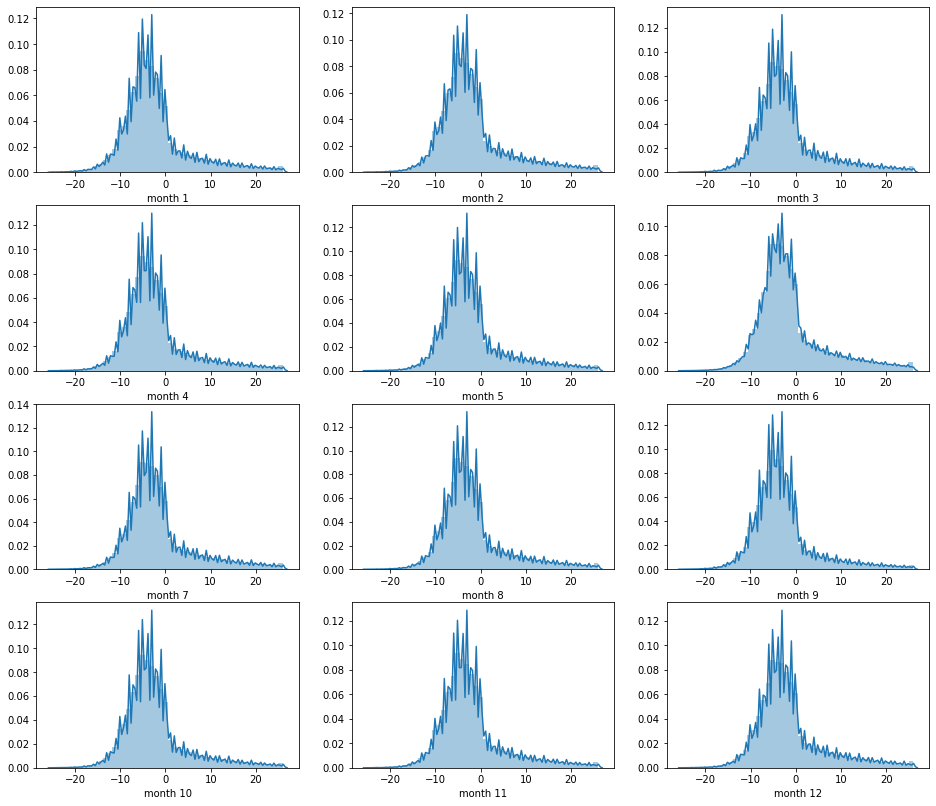

In [90]:
fig, ax = plt.subplots(4,3,figsize=(16,14))
row = 0
col = 0
for i in range(1,13):
    if col == 3:
        row += 1
        col = 0
    sns.distplot(flights_delay[(flights_delay['month'] == i)]['dep_delay'], ax = ax[row][col])
    ax[row][col].set(xlabel= f'month {i}')
    col += 1
plt.savefig('/mnt/d/lighthouse/Midterm/visualization/Task_2_monthly_dep_delay.png')

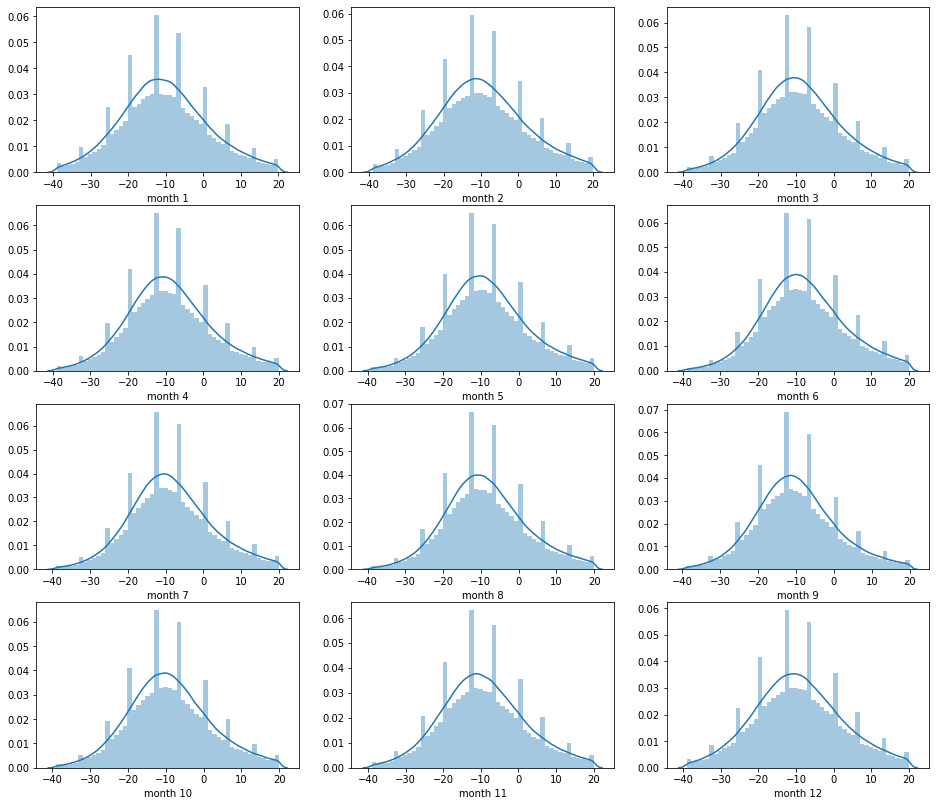

In [91]:
fig, ax = plt.subplots(4,3,figsize=(16,14))
row = 0
col = 0
for i in range(1,13):
    if col == 3:
        row += 1
        col = 0
    sns.distplot(flights_delay[(flights_delay['month'] == i)]['arr_delay'], ax = ax[row][col])
    ax[row][col].set(xlabel= f'month {i}')
    col += 1
plt.savefig('/mnt/d/lighthouse/Midterm/visualization/Task_2_monthly_arr_delay.png')

## 3 Assumptions: samples are independent, normally distributed, and homoscedasticity
### ANOVA is fairly robust to noarmality
### ANOVA is robust to heteroscadasticity if sample size are equal

### Normality assumption

In [92]:
### Normality check (ALL NOT NORMAL)
# Ho: sample is normal
# Ha: sample is not normal

#for i in range(1,13):
    #print(f'month {i}')
    #print(f"arr:{stats.normaltest(flights_delay[flights_delay['month'] == i]['arr_delay'])}")
    #print(f"dep:{stats.normaltest(flights_delay[flights_delay['month'] == i]['dep_delay'])}", '\n')

### homoscedasticity assumption

In [61]:
# equal variance of arr_delay for each month
stats.bartlett(flights_delay [flights_delay ['month'] == 1]['arr_delay'],
               flights_delay [flights_delay ['month'] == 2]['arr_delay'],
               flights_delay [flights_delay ['month'] == 3]['arr_delay'],
               flights_delay [flights_delay ['month'] == 4]['arr_delay'],
               flights_delay [flights_delay ['month'] == 5]['arr_delay'],
               flights_delay [flights_delay ['month'] == 6]['arr_delay'],
               flights_delay [flights_delay ['month'] == 7]['arr_delay'],
               flights_delay [flights_delay ['month'] == 8]['arr_delay'],
               flights_delay [flights_delay ['month'] == 9]['arr_delay'],
               flights_delay [flights_delay ['month'] == 10]['arr_delay'],
               flights_delay [flights_delay ['month'] == 11]['arr_delay'],
               flights_delay [flights_delay ['month'] == 12]['arr_delay'],)

BartlettResult(statistic=21681.295243035216, pvalue=0.0)

In [62]:
# equal variance of dep_delay for each month
stats.bartlett(flights_delay [flights_delay ['month'] == 1]['dep_delay'],
               flights_delay [flights_delay ['month'] == 2]['dep_delay'],
               flights_delay [flights_delay ['month'] == 3]['dep_delay'],
               flights_delay [flights_delay ['month'] == 4]['dep_delay'],
               flights_delay [flights_delay ['month'] == 5]['dep_delay'],
               flights_delay [flights_delay ['month'] == 6]['dep_delay'],
               flights_delay [flights_delay ['month'] == 7]['dep_delay'],
               flights_delay [flights_delay ['month'] == 8]['dep_delay'],
               flights_delay [flights_delay ['month'] == 9]['dep_delay'],
               flights_delay [flights_delay ['month'] == 10]['dep_delay'],
               flights_delay [flights_delay ['month'] == 11]['dep_delay'],
               flights_delay [flights_delay ['month'] == 12]['dep_delay'],)

BartlettResult(statistic=16135.846174054239, pvalue=0.0)

In [69]:
# Taking same sample size so the anova will be more robust against heteroscedasticity
ary_len = []
for i in range(1,13):
    ary_len.append(flights_delay[flights_delay['month'] == i]['dep_delay'].shape[0])
min_len = min(ary_len)

In [70]:
min_len

743042

### Anova, F_test

In [73]:
# Ho: mu1 = mu2 = ... = mu12
# Ha: as least one mu is different
stats.f_oneway(flights_delay[flights_delay['month'] == 1]['dep_delay'][:min_len],
               flights_delay[flights_delay['month'] == 2]['dep_delay'][:min_len],
               flights_delay[flights_delay['month'] == 3]['dep_delay'][:min_len],
               flights_delay[flights_delay['month'] == 4]['dep_delay'][:min_len],
               flights_delay[flights_delay['month'] == 5]['dep_delay'][:min_len],
               flights_delay[flights_delay['month'] == 6]['dep_delay'][:min_len],
               flights_delay[flights_delay['month'] == 7]['dep_delay'][:min_len],
               flights_delay[flights_delay['month'] == 8]['dep_delay'][:min_len],
               flights_delay[flights_delay['month'] == 9]['dep_delay'][:min_len],
               flights_delay[flights_delay['month'] == 10]['dep_delay'][:min_len],
               flights_delay[flights_delay['month'] == 11]['dep_delay'][:min_len],
               flights_delay[flights_delay['month'] == 12]['dep_delay'][:min_len],)

F_onewayResult(statistic=2564.7278456599915, pvalue=0.0)

### Tuckeys test to see which group is significantly different

In [94]:
# Results:
# for arrival: July = Aug
# for departure: Feb = Aug, March = April
arr_tukey_test = pairwise_tukeyhsd(flights_delay["arr_delay"], flights_delay["month"])
dep_tukey_test = pairwise_tukeyhsd(flights_delay["dep_delay"], flights_delay["month"])

In [98]:
#print(arr_tukey_test)

In [97]:
#print(dep_tukey_test)

In [110]:
flights_delay.groupby("month")['dep_delay'].describe().sort_values(by='mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
6,883616.0,-1.173228,7.520128,-25.0,-6.0,-3.0,1.0,26.0
12,885219.0,-1.356979,7.505974,-25.0,-6.0,-3.0,0.0,26.0
7,924690.0,-1.460817,7.399238,-25.0,-6.0,-3.0,0.0,26.0
8,925432.0,-1.675677,7.322552,-25.0,-6.0,-3.0,0.0,26.0
2,743042.0,-1.690198,7.563258,-25.0,-6.0,-3.0,0.0,26.0
5,925450.0,-1.734407,7.312467,-25.0,-6.0,-3.0,0.0,26.0
3,941063.0,-1.765673,7.334147,-25.0,-6.0,-3.0,0.0,26.0
11,905638.0,-2.003794,7.164570,-25.0,-6.0,-3.0,0.0,26.0
4,913161.0,-2.068873,7.227748,-25.0,-6.0,-4.0,0.0,26.0


In [109]:
flights_delay.groupby("month")['arr_delay'].describe().sort_values(by='mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
6,883616.0,-8.056681,10.846153,-39.0,-15.0,-9.0,-1.0,20.0
7,924690.0,-8.719115,10.755355,-39.0,-16.0,-9.0,-2.0,20.0
8,925432.0,-8.758110,10.678960,-39.0,-16.0,-9.0,-2.0,20.0
5,925450.0,-8.829899,10.851961,-39.0,-16.0,-9.0,-2.0,20.0
10,965429.0,-9.029716,10.812121,-39.0,-16.0,-10.0,-2.0,20.0
3,941063.0,-9.153430,11.034935,-39.0,-17.0,-10.0,-2.0,20.0
4,913161.0,-9.250672,10.892114,-39.0,-17.0,-10.0,-2.0,20.0
11,905638.0,-9.377872,11.096466,-39.0,-17.0,-10.0,-2.0,20.0
12,885219.0,-9.476373,11.621584,-39.0,-17.0,-10.0,-2.0,20.0


### Taking into account all actual delays (positive values) without EXTREME outliers, May, June nad July as the highest arrival and departure delays

### Months with biggest departure delay are June, July and December, and months with biggest arrival delay are May, June and October.

### On average there are no delays. flights arrive and depart earlier than scheduled. Flights arrive way earlier than scheduled when compared to scheduled departure times. Lastly, most months differ in term of delay time however (june, july, august) are near the top in terms of delay time (in both dep and arr). this indicates that flights are most accurate with their schedules in those three months? in term of "which are months with the biggest delays and what could be the reason" none have delays, but if we're talking about latest arr and dep it woul still be (june, july, august) having the lowest "early arrival" and "early departure time". reason COULD be Summer break and alot of families take vacations at this time interval causing flights to be later (although still ealier than scheduled) than usual.

### combining findings from both (positive delay only) and (all delay) we can see that on average all flights are usually early. However if there is a delay, it is normally due to the departure time. That is why we see a larger (although negative) mean departure delay time when we take into account all delay times. 